In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import string
import re

import warnings
warnings.filterwarnings("ignore")
Z = pd.read_csv('.\SMSSpamCollection.csv')

In [77]:
Z.head(10)

,target,text
0,ham,Go until jurong point
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,Nah I don't think he goes to usf
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [78]:
Z["text"].count()

5548

In [79]:
Z.target.unique()

array(['ham', 'spam', 'target'], dtype=object)

In [80]:
y=Z["target"]
X=pd.DataFrame(Z['text'])


In [81]:
X

,text
0,Go until jurong point
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,Nah I don't think he goes to usf
...,...
5547,This is the 2nd time we have tried 2 contact u...
5548,Will ü b going to esplanade fr home?
5549,Pity
5550,The guy did some bitching but I acted like i'd...


Обработка текстов

In [82]:

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [83]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\glebb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\glebb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [88]:
stop = stopwords.words('english')

In [89]:
print (' '.join(stopwords.words('english')[:20]))

i me my myself we our ours ourselves you you're you've you'll you'd your yours yourself yourselves he him his


In [90]:
import tqdm

In [91]:
# Функция обработки текста 
def preprocess_text(texts):
    stop_words = set(stopwords.words('english'))
    regex = re.compile('[^a-z A-Z]')
    #regex = re.compile('[^а-я А-Я]')
    preprocess_texts = []
    for i in  tqdm.tqdm(range(len(texts))):
    #for i in  range(len(texts)):
        text = texts[i].lower()
        text = regex.sub(' ', text)
        word_tokens = word_tokenize(text) 
        filtered_sentence = [w for w in word_tokens if not w in stop_words] 
        preprocess_texts.append( ' '.join(filtered_sentence))
    
    return preprocess_texts

In [92]:
def stemming_texts(texts):
    st = nltk.stem.snowball.EnglishStemmer('english')
    stem_text = []
    for text in tqdm.tqdm(texts):
        word_tokens = word_tokenize(text)
        stem_text.append(' '.join([st.stem(word) for word in word_tokens]))
    return stem_text

In [93]:
X = X.fillna("s")
X.isnull().sum()

text    0
dtype: int64

In [95]:
X.head(10)

,text
0,Go until jurong point
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,Nah I don't think he goes to usf
5,FreeMsg Hey there darling it's been 3 week's n...
6,Even my brother is not like to speak with me. ...
7,As per your request 'Melle Melle (Oru Minnamin...
8,WINNER!! As a valued network customer you have...
9,Had your mobile 11 months or more? U R entitle...


In [96]:
X['text'] = preprocess_text(X['text'])

100%|████████████████████████████████████████████████████████████████████████████| 5552/5552 [00:00<00:00, 9037.11it/s]


In [26]:
X['text'] = stemming_texts(X['text'])

100%|████████████████████████████████████████████████████████████████████████████| 5552/5552 [00:00<00:00, 5926.28it/s]


In [97]:
X.head(10)

,text
0,go jurong point
1,ok lar joking wif u oni
2,free entry wkly comp win fa cup final tkts st ...
3,u dun say early hor u c already say
4,nah think goes usf
5,freemsg hey darling week word back like fun st...
6,even brother like speak treat like aids patent
7,per request melle melle oru minnaminunginte nu...
8,winner valued network customer selected receiv...
9,mobile months u r entitled update latest colou...


In [98]:
X=X.text

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vectorizer = TfidfVectorizer(stop_words=stop, ngram_range=(1, 2), min_df=0.001, norm=None)

In [31]:
#Разбиваем на тестовую и обучающие выборки
from sklearn.model_selection import train_test_split
Xtr, Xval, ytr, yval = train_test_split(X, y, test_size=0.30, random_state=42)

In [32]:
Xtr_tfidf = tf_vectorizer.fit_transform(Xtr)
Xval_tfidf = tf_vectorizer.transform(Xval)

In [33]:
Xtr_tfidf.shape, Xval_tfidf.shape

((3886, 1634), (1666, 1634))

In [34]:
Xtr_tfidf[:,].shape

(3886, 1634)

In [35]:
Xtr_tfidf.shape

(3886, 1634)

Методы логистической регрессии к нашим данным

In [38]:
from sklearn.linear_model import SGDClassifier, LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold, train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [40]:
logit_sgd = SGDClassifier(
    loss='log', 
    shuffle=True, 
    n_iter_no_change=10, 
    max_iter=500, 
    penalty='l2', 
    random_state=42
)

In [41]:
logit_sgd.fit(Xtr_tfidf, ytr)

print("train accuracy=", accuracy_score(logit_sgd.predict(Xtr_tfidf), ytr))
print("validation accuracy=",accuracy_score(logit_sgd.predict(Xval_tfidf), yval))

print(classification_report(logit_sgd.predict(Xval_tfidf), yval))

train accuracy= 0.9948533196088523
validation accuracy= 0.975390156062425
              precision    recall  f1-score   support

         ham       0.99      0.98      0.99      1471
        spam       0.87      0.93      0.90       195

    accuracy                           0.98      1666
   macro avg       0.93      0.96      0.94      1666
weighted avg       0.98      0.98      0.98      1666



In [43]:
Xtr_tfidf.shape, ytr.shape

((3886, 1634), (3886,))

In [44]:
logit_cv = LogisticRegressionCV(Cs=10, n_jobs=-1, multi_class='ovr')
logit_cv.fit(Xtr_tfidf, ytr)

LogisticRegressionCV(multi_class='ovr', n_jobs=-1)

In [45]:
print("train accuracy=", accuracy_score(logit_cv.predict(Xtr_tfidf), ytr))
print("validation accuracy=", accuracy_score(logit_cv.predict(Xval_tfidf), yval))

print(classification_report(logit_cv.predict(Xval_tfidf), yval))

train accuracy= 0.9948533196088523
validation accuracy= 0.9765906362545018
              precision    recall  f1-score   support

         ham       1.00      0.98      0.99      1483
        spam       0.84      0.97      0.90       183

    accuracy                           0.98      1666
   macro avg       0.92      0.97      0.94      1666
weighted avg       0.98      0.98      0.98      1666



In [46]:
def visualize_coefficients(coef, feature_names, title, plot_num, n_top_features=25):
    interesting_coefficients = np.argsort(coef)[-n_top_features:]
    
    plt.figure(figsize=(15, 15))
    plt.subplot(510+plot_num+1)
    colors = ["lightblue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + n_top_features), 
               feature_names[interesting_coefficients], rotation=60, ha="right", fontsize=14);
    plt.title(title)

In [47]:
logit_cv.coef_

array([[ 4.26628000e-02,  2.54539459e-02,  5.09709469e-02, ...,
         3.22768580e-02,  1.96371243e-01, -3.42469167e-02],
       [-4.17372632e-02, -2.57982180e-02, -5.06842413e-02, ...,
        -3.21032354e-02, -1.94121566e-01,  3.28793166e-02],
       [-9.60808659e-07, -9.61858538e-07, -1.61187767e-06, ...,
        -9.61014291e-07, -4.62326250e-06, -7.88146502e-07]])

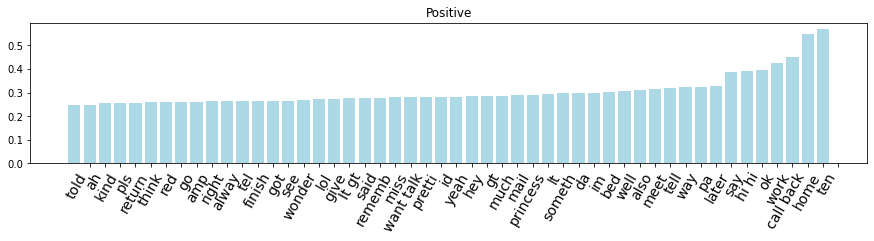

In [56]:
visualize_coefficients(logit_cv.coef_[0,:], tf_vectorizer.get_feature_names(),title="Positive", plot_num=0, n_top_features=50)

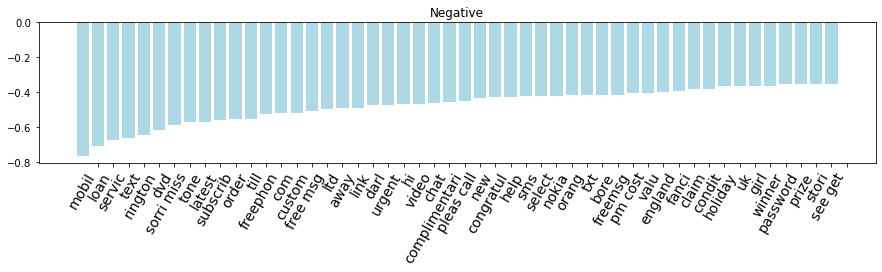

In [59]:
def visualize_coefficients_2(coef, feature_names, title, plot_num, n_top_features=50):
    interesting_coefficients = np.argsort(coef)[0:n_top_features]
    
    plt.figure(figsize=(15, 15))
    plt.subplot(510+plot_num+1)
    colors = ["lightblue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + n_top_features), 
               feature_names[interesting_coefficients], rotation=60, ha="right", fontsize=14);
    plt.title(title)
visualize_coefficients_2(logit_cv.coef_[0,:], tf_vectorizer.get_feature_names(),title="Negative", plot_num=1, n_top_features=50)